___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [3]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [7]:
# Checking the shape of one image
x_train[5].shape

(28, 28)

In [4]:
x_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

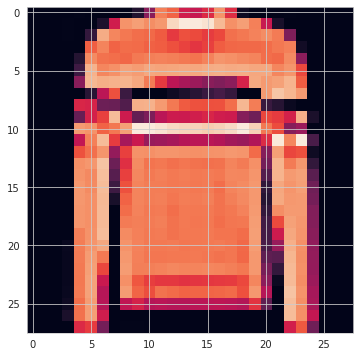

In [5]:
plt.imshow(x_train[5])
# plt.matshow(X_train[5])

In [6]:
y_train[5]

2

In [7]:
y_train.shape

(60000,)

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [10]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [11]:
y_train[0]

9

In [12]:
classes[y_train[0]]

'Ankle boot'

In [13]:
classes[int(y_train[0])]

'Ankle boot'

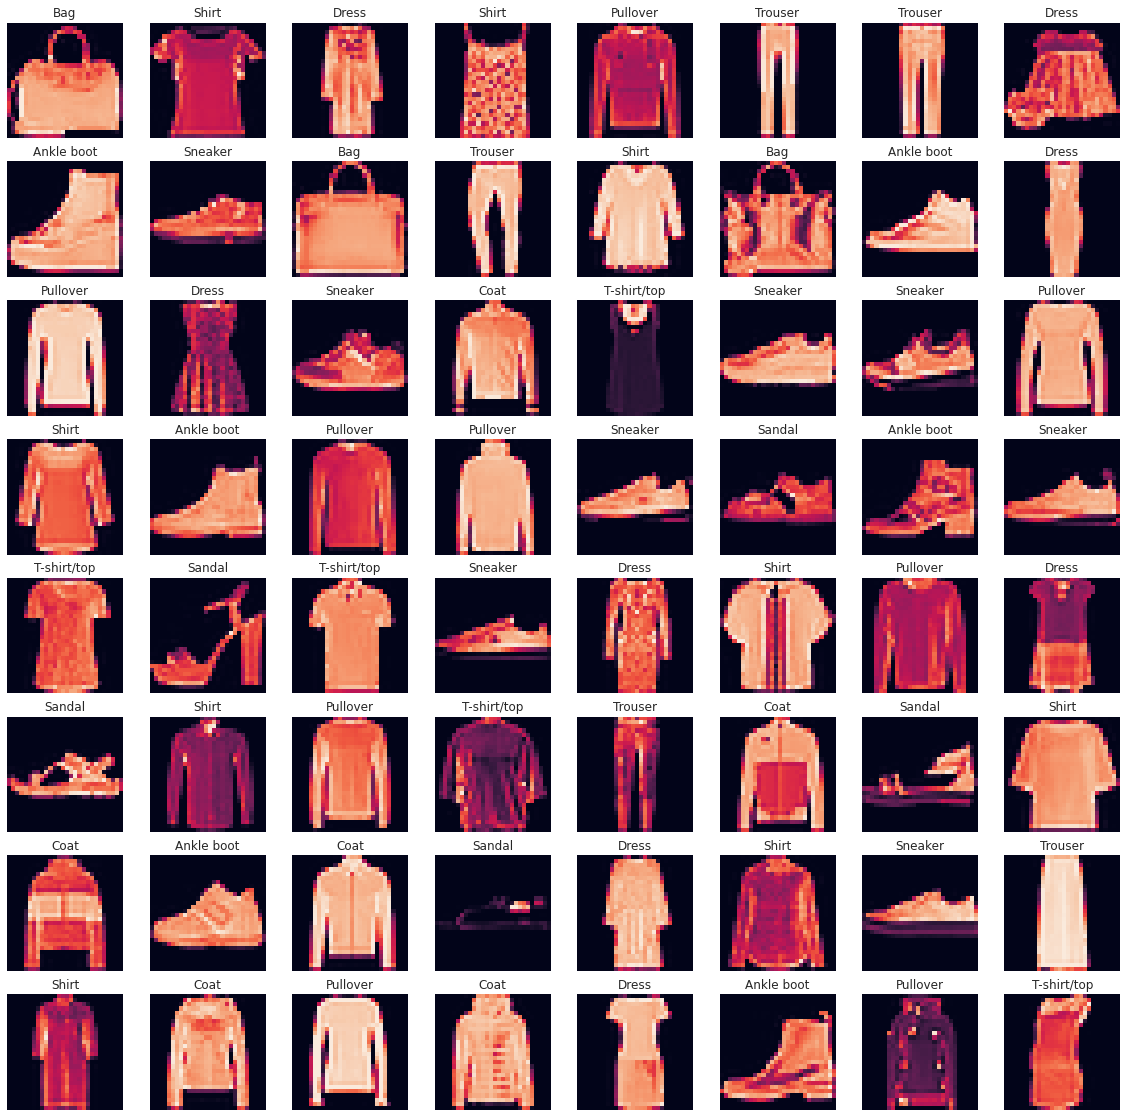

In [14]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [16]:
x_train[5].min()

0

In [17]:
x_train[5].max()

255

In [18]:
# Normalize image pixels

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [20]:
x_train[5].min()

0.0

In [21]:
x_train[5].max()

1.0

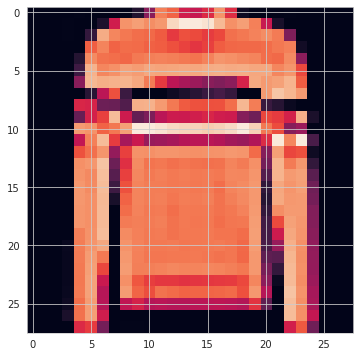

In [23]:
plt.imshow(x_train[5])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [25]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [26]:
X_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [27]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [28]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [31]:
y_train[0]

9

In [32]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [34]:
model = Sequential()

model.add(Conv2D(filters=28,kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 28)        7084      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 28)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 13552)             0         
                                                                 
 dense (Dense)               (None, 128)               1

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [38]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 190s 101ms/step - loss: 0.3759 - accuracy: 0.8648 - val_loss: 0.3123 - val_accuracy: 0.8802
Epoch 2/10
1875/1875 [==============================] - 192s 103ms/step - loss: 0.2539 - accuracy: 0.9083 - val_loss: 0.2669 - val_accuracy: 0.9056
Epoch 3/10
1875/1875 [==============================] - 189s 101ms/step - loss: 0.2221 - accuracy: 0.9207 - val_loss: 0.2720 - val_accuracy: 0.9061
Epoch 4/10
1875/1875 [==============================] - 176s 94ms/step - loss: 0.2014 - accuracy: 0.9295 - val_loss: 0.3124 - val_accuracy: 0.9080


**TASK 7: Plot values of metrics you used in your model.**

In [39]:
model.metrics_names

['loss', 'accuracy']

In [40]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,0.376,0.865,0.312,0.880
1,0.254,0.908,0.267,0.906
2,0.222,0.921,0.272,0.906
3,0.201,0.930,0.312,0.908


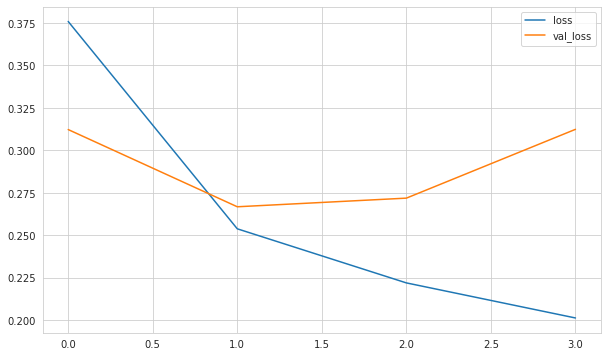

In [41]:
summary[["loss", "val_loss"]].plot();

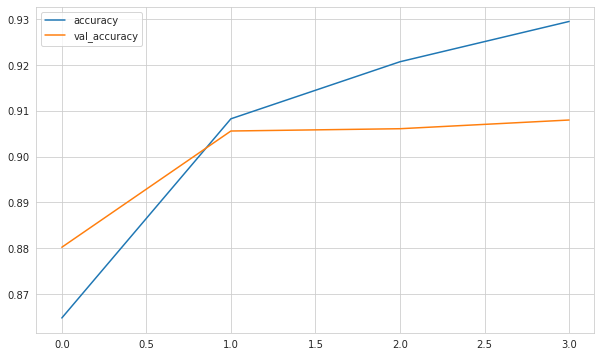

In [42]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.2669 - accuracy: 0.9056


[0.2668682932853699, 0.9056000113487244]

In [45]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2668682932853699
Test accuracy: 0.9056000113487244


In [46]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 6s 18ms/step


array([[2.1114985e-09, 6.3432752e-11, 2.0586249e-08, ..., 1.8704354e-04,
        3.5203893e-08, 9.9980187e-01],
       [1.5774514e-05, 1.7698545e-14, 9.9997777e-01, ..., 1.5586874e-12,
        1.4364282e-09, 2.0759709e-12],
       [4.4226780e-08, 9.9999982e-01, 2.0101911e-09, ..., 3.0512020e-11,
        6.0029248e-09, 3.8511340e-11],
       ...,
       [4.1858573e-08, 3.7370392e-14, 9.2970268e-08, ..., 6.8253500e-11,
        9.9999863e-01, 3.1735493e-11],
       [6.7950152e-11, 9.9999994e-01, 2.7148299e-12, ..., 1.7900404e-13,
        5.4439488e-13, 1.9516513e-12],
       [5.7414256e-04, 1.7622449e-05, 6.0790789e-04, ..., 1.7682899e-02,
        6.6346349e-03, 2.7003998e-03]], dtype=float32)

In [47]:
y_pred = np.argmax(pred_prob, axis=1)

In [48]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [49]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [50]:
print(confusion_matrix(y_test, y_pred))

[[877   0  22   7   3   0  85   0   6   0]
 [  0 972   2  15   3   0   6   0   2   0]
 [ 16   0 901   6  45   0  32   0   0   0]
 [ 15   4  21 895  36   0  29   0   0   0]
 [  1   0  69  24 866   0  40   0   0   0]
 [  1   0   0   0   0 975   0   9   1  14]
 [110   1  97  24  94   0 669   0   5   0]
 [  0   0   0   0   0  13   0 966   0  21]
 [  2   1  12   1   2   4   3   3 972   0]
 [  1   0   0   0   0   4   0  32   0 963]]


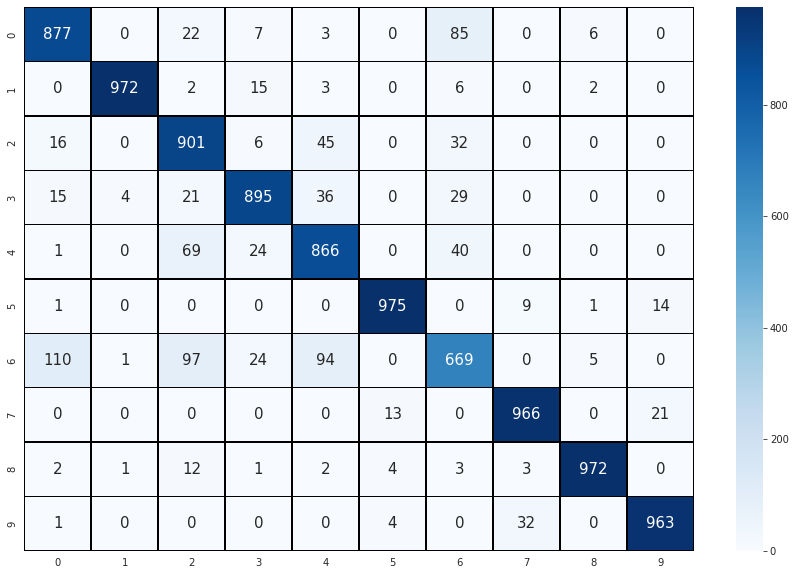

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.90      0.85      1000
           3       0.92      0.90      0.91      1000
           4       0.83      0.87      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.77      0.67      0.72      1000
           7       0.96      0.97      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Prediction

In [53]:
my_image = X_test[44]

In [54]:
my_image.shape

(28, 28, 1)

In [56]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

1/1 [==============================] - 0s 24ms/step


In [57]:
image_prediction

array([[7.6580189e-05, 4.2459733e-06, 2.4516918e-03, 3.6433688e-05,
        1.6328649e-01, 8.1221742e-07, 8.3406699e-01, 1.9582504e-07,
        7.5149503e-05, 1.4368647e-06]], dtype=float32)

In [58]:
np.argmax(image_prediction, axis=1)

array([6])

In [59]:
result=np.argmax(image_prediction, axis=1)

In [60]:
result

array([6])

In [61]:
classes[int(result)]

'Shirt'

In [62]:
model.save("img_class_cnn.h5")

In [65]:
import tensorflow as tf 
model=tf.keras.models.load_model('img_class_cnn.h5')

In [66]:
X_test[15].shape

(28, 28, 1)

In [67]:
np.expand_dims(X_test[15],axis=0).shape

(1, 28, 28, 1)

In [68]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

1/1 [==============================] - 0s 74ms/step


In [69]:
np.argmax(pred)

1

In [71]:
classes[8]

'Bag'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___